In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [329]:
class TSP:
    
    def __init__(self,list_pts):
        self.list_pts = list_pts
        self.solution=[]
    
    def solve(self):
        
        
        distance_matrix=distance.cdist(self.list_pts, self.list_pts, 'euclidean')
        
        num_starting_point=np.random.randint(0,len(self.list_pts))
        starting_point = self.list_pts[num_starting_point,:]
        
        self.solution.append(starting_point)
        
        for i in range(len(self.list_pts)):
            
            distance_matrix[i,num_starting_point]=float('inf')
        
        
        num_next_point=num_starting_point
        
        for i in range(len(self.list_pts)):
            
            num_next_point=np.argmin(distance_matrix[num_next_point,:])
            next_point = self.list_pts[num_next_point,:]
            self.solution.append(next_point)
            
            for j in range(len(self.list_pts)):
            
                distance_matrix[j,num_next_point]=float('inf')
        
        self.solution.append(starting_point)
        return(self.solution)
    
    def display(self):
        
        
        if (self.solution==[]):
                self.solve()
                
        
        x=[i[0] for i in self.solution]
        y=[i[1] for i in self.solution]

        plt.plot(x, y, marker="o", markerfacecolor="r")
        
    def cost(self):
        
        if (self.solution==[]):
                self.solve()
                
        return(np.sum(distance.cdist(self.solution, self.solution, 'euclidean'))/2)
        
        

1149.8173901888645

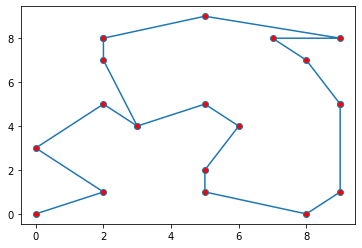

In [332]:
test=TSP(np.random.randint(10, size=(20, 2)))
test.display()
test.cost()